__recap__
LDA is created as a linear combination of your features such that using the LDA features, you can better predict the dependent variable.

PCA is based on variance, eigen vector matrix to create PC components

# Unsupervised Learning

- In supervised, the model will produce the __class label__ while in unsupervised, it will give the __likelihood or cluster label/ID or better representation__
- In supervised, the dataset is labeled while in unsupervised, the data is not labeled

### Application of unsupervised learning
1. Clustering (similarity)
2. Anomaly detection e.g. credit card fraud

## Types of Clustering

1. Hierarchical
        i. Agglomerative
        ii.Divisive (not available in sklearn yet) 
2. Partitioning
        i. K-means
        ii.Fuzzy C-means(not available in sklearn yet) 

# 1. K-means Clustering (partitioning clustering)

1. Define the K value (where k is the number of clusters you are expecting from the dataset)
How to determine best K value
- i. Visually look at the data points (pairplot or a scatterplot)
- ii. Elbow plot method - Within Cluster Sum of Square (WCSS on y axis and # of clusters on x axis)

2. Initialize centers randomly - centroids
The number of centroids initialized is always equal to the value of k.

3. The distance between the centroid and all the data points are calculated and the points closest to the centroid are assigned to that centroid

4. The centroid positions are moved towards the center of it's own cluster (i.e. towards the center of the data points assigned to it in step 3)

These steps are iterative and keeps repeating i.e centroids/centers are readjusted and steps 3 and 4 repeated and continues until there is no change in the cluster


The dataset is about drivers say Uber drivers and you want to have them grouped/clustered based on patterns in the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Import the dataset

In [2]:
driver_df = pd.read_csv('driver-data.csv')
driver_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
driver_df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [4]:
driver_df.info

<bound method DataFrame.info of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

The id column is of no use so get rid of it. You'll have 2 columns left

In [5]:
# dropping the id column

driver_df.drop('id', axis=1, inplace=True)

## 2. Determine the number of clusters - k value for the dataset 

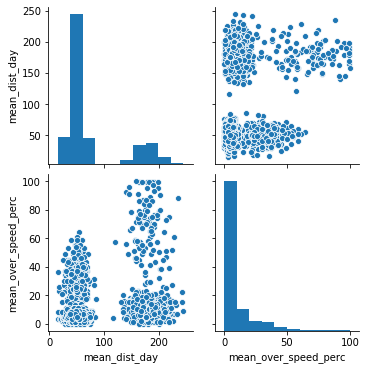

In [6]:
# visually check the number of clusters (k value)

sns.pairplot(driver_df)

From the plots above, 2 clusters seem like the best choice

## 3. Build the K means model

In [11]:
from sklearn.cluster import KMeans

# instantiate the estimator object
kmeans_model = KMeans(n_clusters = 2)  
# n_clusters parameeter here is the k value 

# model: fit the estimator to the data
kmeans_model.fit(driver_df)  
# fit it on the whole data. There is no target(y) in unsupervised learning

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 4. Check centroid values

In [12]:
## Taking a look at the centroid values

print('Centroid coordinated of the 2 clusters are:')
print(kmeans_model.cluster_centers_)

Centroid coordinated of the 2 clusters are:
[[ 50.04763437   8.82875   ]
 [180.017075    18.29      ]]


You have 2 coordinates from above step because you have 2 features(dimension). Remember that every feature gives a dimension so  you have 2 dimension hence 2 coordinates

In [14]:
print('Cluster labels for various data points present in the given data are:')

print(kmeans_model.labels_)

Cluster labels for various data points present in the given data are:
[0 0 0 ... 1 1 1]


In [16]:
driver_df.head(15)

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
5,41.91,10
6,58.64,20
7,52.02,8
8,31.25,34
9,44.31,19


In [17]:
# to see the data points with corresponding label
driver_df['Cluster labels'] = kmeans_model.labels_
driver_df.tail(20)

,mean_dist_day,mean_over_speed_perc,Cluster labels
3980,187.13,12,1
3981,187.28,8,1
3982,192.74,13,1
3983,211.20,8,1
3984,189.88,9,1
3985,165.58,6,1
3986,191.88,7,1
3987,194.22,12,1
3988,167.22,2,1
3989,185.37,14,1


## 5. Check for anomaly

If all the data points were assigned to a cluster, it means there is no anomaly so the number of labels = the number of observations/records. 

Print the length of the label and compare it with the number of observations from driver_df.shape. If they are same, it means all the data points/observations were labeled.

In [18]:
print(len(kmeans_model.labels_))

4000


## 6. Visualize the cluster

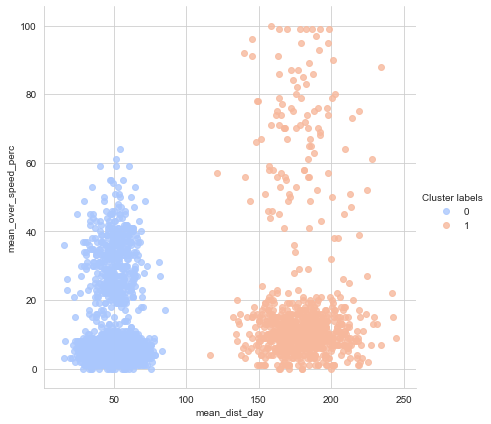

In [25]:
# plot the data

sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=driver_df, hue='Cluster labels', palette='coolwarm', height=6, aspect=1, fit_reg=False)

### 1b. Using Elbow plot method to determine k value instead of with a pairplot as above

The elbow plot helps you confirm the optimal value of k and not rely on your visual deduction.

### Elbow method using WCSS

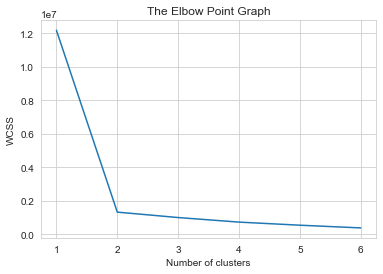

In [24]:
wcss = []
for i in range(1, 7):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(driver_df)
    # appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans1.inertia_)
    
# plotting the elbow graph
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Elbow-Method using WCSS__ – This is one of the most common and technically robust methods. This is based on principle WCSS decreases with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster from, say, 3 to 4 is higher than that for increasing from 4 to 5. Plotting WCSS against increasing k can show an ‘elbow’ which demarks significant drop in rate of increase. Selecting number of clusters corresponding to elbow point achieves reasonable performance without having too many clusters. This is still judgmental since what constitutes elbow is visually determined. Further, in practice, there may not be an elbow but smooth curve, or, there may be more than one elbow.

Remember that decrease in WCSS means increasing in clustering performance. In this case, this method is able to help us arrive at true number of clusters.

## End of Partitional clustering (KMeans algorithm)

# Agglomerative (Hierarchical Clustering)

The clustering happens step by step like a hierarchy

1. Create distance matrix of the data i.e. distance between all the points is calculated

How do you want the points to be calculated? single-linkage, mean-linkage, complete_linkage, centroid linkage
You will indicat this in the instantiation of the estimator object

2. To determine the optimal number of clusters, use a __dendrogram__. The optimal number of clusters is the point where you can draw a horizontal line across the _longest_ vertical line of the clusters

In a dendrogram:

y axis rep dissimilarity
x axis rep the data point

Customer segmentation example - To be able to give targetted discount to customers say high spenders

## 1. Import the dataset

In [26]:
import pandas as pd

customer_shopping_df = pd.read_csv('shopping_data.csv')

In [27]:
customer_shopping_df.shape

(200, 5)

Filter out customer ID, gender and age as they have little contribution to dettermining what customers buy. A man can buy women wares for family and friends and vice versa

In [28]:
filter_data = customer_shopping_df.iloc[:,3:5]

filter_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## 2. Determine the number of clusters

#### Use the dendogram to identify the optimal number of clusters in the dataset

The dendrogram is in the scipy cluster hierarchy package 

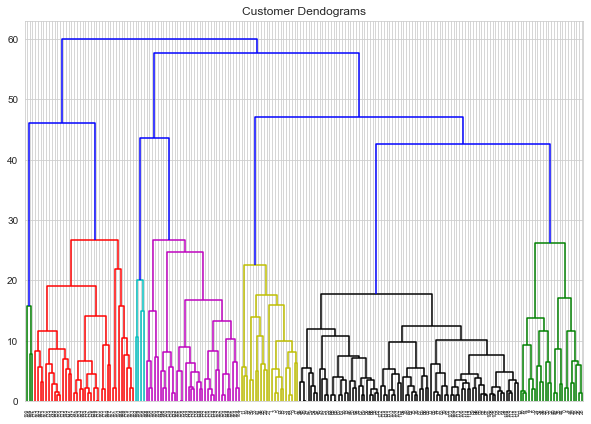

In [30]:
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,7))
plt.title('Customer Dendograms')

dend = shc.dendrogram(shc.linkage(filter_data.values, method='average'))

The optimal number of clusters as can be seen from the dendrogram is 7

Note: you need to use the same likeage (method='average') used in the dendrogram in the model i.e the estimator object
    
The affinity is the way you want the distance to be calculated e.g. manhattan, euclidean etc

## 3. Build the Agglomerative model

In [33]:
from sklearn.cluster import AgglomerativeClustering

# intantiate the estimator object
agglo_cluster = AgglomerativeClustering(n_clusters = 7, linkage='average', affinity='manhattan')

# fit to data
agglo_cluster.fit(filter_data)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7)

## 4. Create a cluster label to view which data points are asssigned which label

In [34]:
print('Cluster labels for various points present in the dataset are:')
print(agglo_cluster.labels_)

Cluster labels for various points present in the dataset are:
[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 6 2 6 5 6 5 6 5]


## 5. Check for anomaly

In [35]:
print(len(agglo_cluster.labels_))

200


The length of cluster labels match the number of observations/records so no anomaly detected

## 6. Visualize clusters

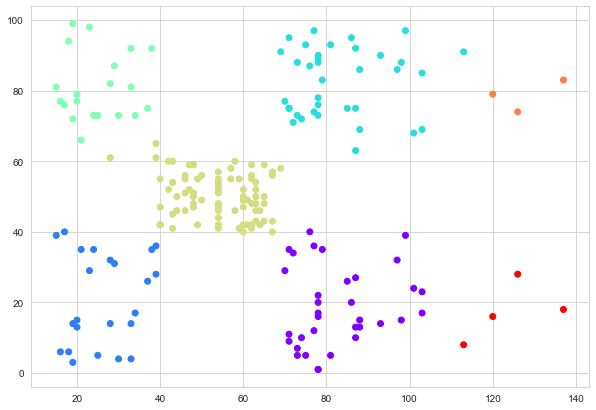

In [36]:
plt.figure(figsize=(10,7))  # initialize the canvas size
plt.scatter(filter_data.values[:,0], filter_data.values[:,1], c=agglo_cluster.labels_, cmap='rainbow')

In [37]:
customer_shopping_df['Cluster Labels'] = agglo_cluster.labels_

customer_shopping_df.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Labels
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
5,6,Female,22,17,76,3
6,7,Female,35,18,6,1
7,8,Female,23,18,94,3
8,9,Male,64,19,3,1
9,10,Female,30,19,72,3


## End of Agglomerative Clustering Section